**1. Data Collection**

**Goal:** Obtain a reliable COVID-19 dataset.

**Action:**
*   Use the Our World in Data COVID-19 dataset (recommended for beginners).
*   COVID-19 dataset source: https://covid.ourworldindata.org/data/owid-covid-data.csv
*   Upload to Colab:
  *   In Colab, click the Files tab (left sidebar).
  *   Click Upload and select owid-covid-data.csv.

Alternatively, load directly from the URL using pandas (no manual upload needed).



**2. Data Loading & Exploration**

In [11]:
import pandas as pd

# Load data directly from URL
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Explore
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred'

**3. Data Cleaning**

In [12]:
# Filter countries
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Handle missing values (e.g., fill numeric columns with 0)
df['total_cases'] = df['total_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)

# Check cleaned data
print(df.isnull().sum())

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       4821
excess_mortality_cumulative                4821
excess_mortality                           4821
excess_mortality_cumulative_per_million    4821
Length: 67, dtype: int64


<ipython-input-12-b7f072bf2b82>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
<ipython-input-12-b7f072bf2b82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_cases'] = df['total_cases'].fillna(0)
<ipython-input-12-b7f072bf2b82>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

**4. Exploratory Data Analysis (EDA)**

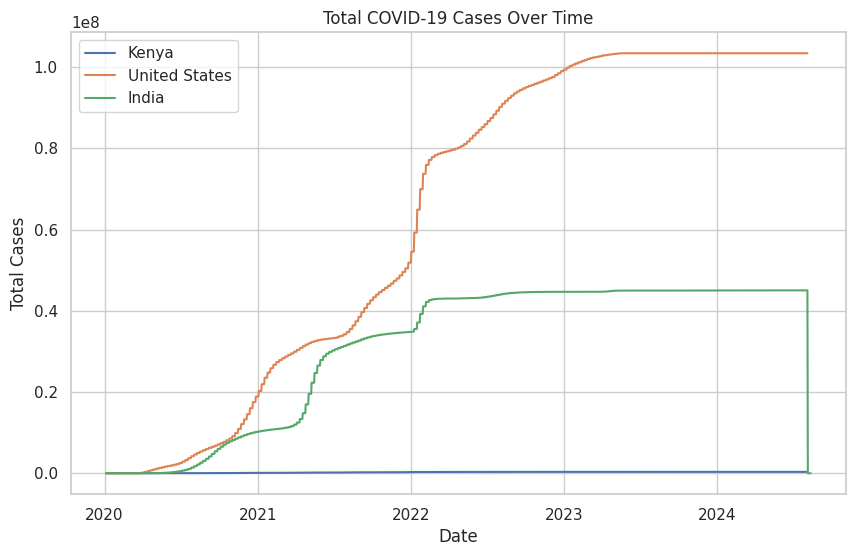

location
India            0.013685
Kenya            0.018876
United States    0.016893
Name: death_rate, dtype: float64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
print(df.groupby('location')['death_rate'].mean())

**5. Visualizing Vaccination Progress**

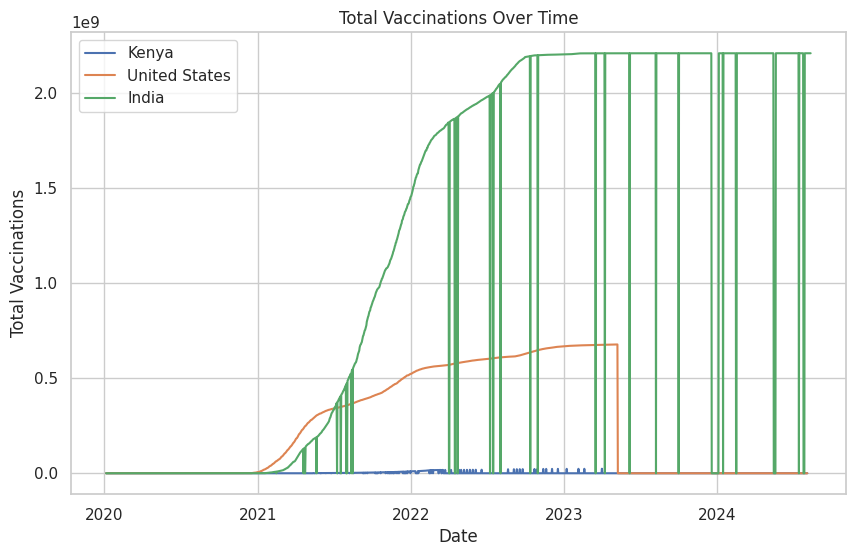

In [14]:
# Plot total vaccinations
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

**6. Optional: Choropleth Map**

In [15]:
# Install Plotly
!pip install plotly

import plotly.express as px

# Latest data for choropleth
latest_data = df[df['date'] == df['date'].max()]

# Choropleth map for total cases
fig = px.choropleth(
    latest_data,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Global COVID-19 Cases by Country'
)
fig.show()

**7. Insights & Reporting**

**Goal:** Summarize findings in the Colab notebook.

**Tasks:**
*   Use markdown cells for narrative.
*   Highlight 3-5 key insights (e.g., “Kenya’s vaccination rate lagged behind the USA”).
*   Combine code, visuals, and text.




